# I. Introduction

A new firmware revision has been developed for ICARUS that enables compression of the raw data within the A2795 TPC readout boards. The firmware upgrade requires operations per-board through the optical chain (specified by a "CONET link/node" pair) of the readout via the TPC server machines. The compression scheme naturally results in modifications to the data within each fragment and requires some new functionality in the TPC decoder to be able to unpack the new format. The firmware upgrading and the changes to the DAQ and decoder code is principally being done by Harry Hausner (FNAL).

Due to these changes affecting the raw data and TPC decoder, concerns have been raised about negative impacts to downstream (most likely from bugs in firmware/code updates). As part of the validation process, we are exploring the data quality through a few different metrics:

1. Overall noise levels as measured by the RMS of waveforms before and after coherent noise removal.
2. Height of the largest hit.
3. Time of the largest hit.
4. Summed ADC of the largest hit.

In the case of the latter three, the "largest hit" is defined as the hit with the highest summed ADC per waveform. These four metrics have been integrated into the ICARUS noise analysis code, and so have been chosen both because they require no additional development and because they cover the spectrum of issues that we might expect to encounter from a problem with the firmware upgrade.

# II. Setup

We need to set up the necessary libraries for reading from the output files of the ICARUS noise analysis:

In [1]:
import sys
sys.path.append('/Users/mueller/Projects/GitRepos/ICARUSNoiseAnalysis/noise/')
from fnal import Dataset
from utilities import plot_planes_new
import matplotlib.pyplot as plt

plt.style.use('/Users/mueller/Projects/GitRepos/ICARUSNoiseAnalysis/plot_style.mplstyle')

We also need to define some plotting functions that will be necessary for making these comparisons:

In [2]:
def plot_signal_height(data, labels, cap=None):
    """
    Plots a comparison of the signal height for the input datasets.

    Parameters
    ----------
    data: list[Dataset]
        The list of datasets to use in the comparison.
    labels: list[str]
        The labels associated with each dataset.
    cap: float
        The maximum y-value of the plot.

    Returns
    -------
    None.
    """
    figure = plt.figure(figsize=(8,6))
    ax = figure.add_subplot()
    for di, d in enumerate(data):
        ax.hist(d.noise_data['mhit_height'], bins=50, range=(1,30), label=labels[di], histtype='step', density=True)
    ax.set_xlim(1, 30)
    ax.set_xlabel('Largest Hit Height')
    ax.set_ylabel('Entries')
    if cap is not None:
        ax.set_ylim(0, cap)
    ax.legend()

def plot_signal_time(data, labels, cap=None):
    """
    Plots a comparison of the signal time for the input datasets.

    Parameters
    ----------
    data: list[Dataset]
        The list of datasets to use in the comparison.
    labels: list[str]
        The labels associated with each dataset.
    cap: float
        The maximum y-value of the plot.

    Returns
    -------
    None.
    """
    figure = plt.figure(figsize=(8,6))
    ax = figure.add_subplot()
    for di, d in enumerate(data):
        ax.hist(d.noise_data['mhit_time'], bins=50, range=(1,4096), label=labels[di], histtype='step', density=True)
    ax.set_xlim(1, 4096)
    ax.set_xlabel('Largest Hit Time')
    ax.set_ylabel('Entries')
    if cap is not None:
        ax.set_ylim(0, cap)
    ax.legend()

def plot_signal_sadc(data, labels, cap=None):
    """
    Plots a comparison of the summed ADC for the input datasets.

    Parameters
    ----------
    data: list[Dataset]
        The list of datasets to use in the comparison.
    labels: list[str]
        The labels associated with each dataset.
    cap: float
        The maximum y-value of the plot.

    Returns
    -------
    None.
    """
    figure = plt.figure(figsize=(8,6))
    ax = figure.add_subplot()
    for di, d in enumerate(data):
        ax.hist(d.noise_data['mhit_sadc'], bins=50, range=(1,750), label=labels[di], histtype='step', density=True)
    ax.set_xlim(1, 750)
    ax.set_xlabel('Largest Hit Summed ADC')
    ax.set_ylabel('Entries')
    if cap is not None:
        ax.set_ylim(0, cap)
    ax.legend()

# III. Comparisons

The plotting functions take as input a `Dataset` object, which is an object designed to encapsulate all outputs of the noise analysis for a single run. We will first need to create the `Dataset` object for each of the runs we wish to compare.

In [3]:
data = [Dataset(f'/Users/mueller/data/run11050.root'), Dataset(f'/Users/mueller/data/run11051.root')]
labels = ['Run 11050 (No Compression)', 'Run 11051 (With Compression)']

Finally, make a plot of each metric:

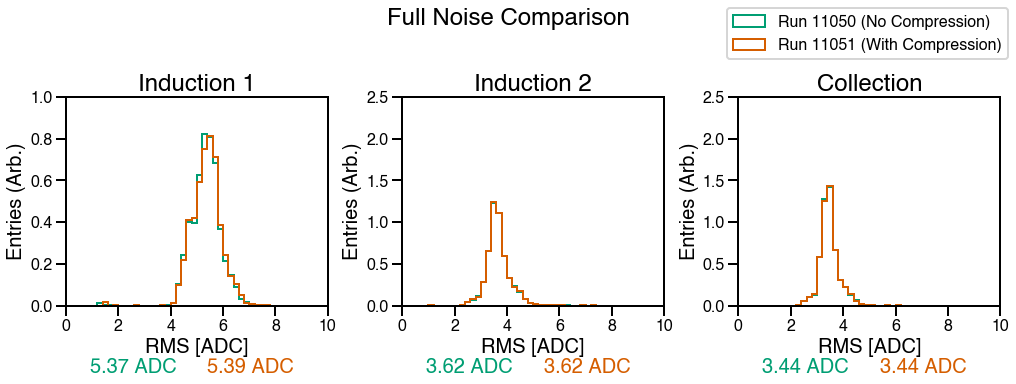

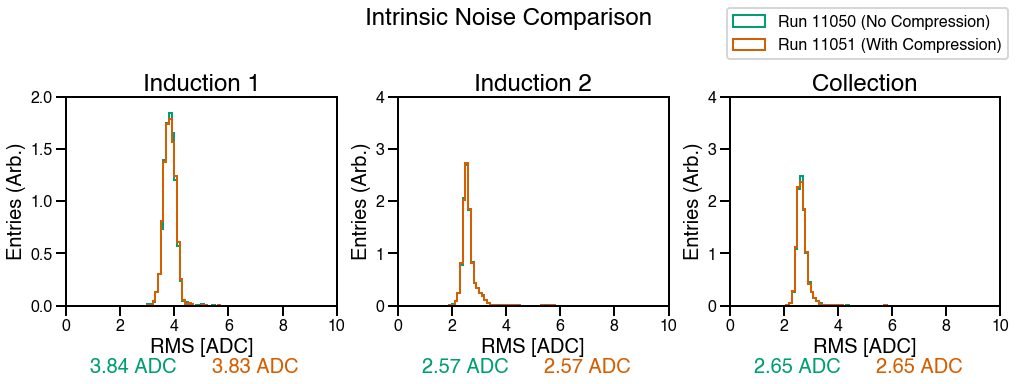

In [4]:
plot_planes_new(data, labels, 'raw_rms', 'Full Noise Comparison', normalize=True, cap=[1.0, 2.5, 2.5], wired_only=True, tpc=2)
plot_planes_new(data, labels, 'int_rms', 'Intrinsic Noise Comparison', normalize=True, cap=[2.0, 4.0, 4.0], wired_only=True, tpc=2)

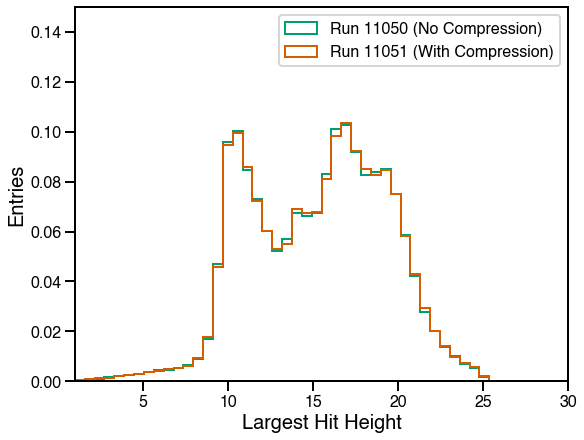

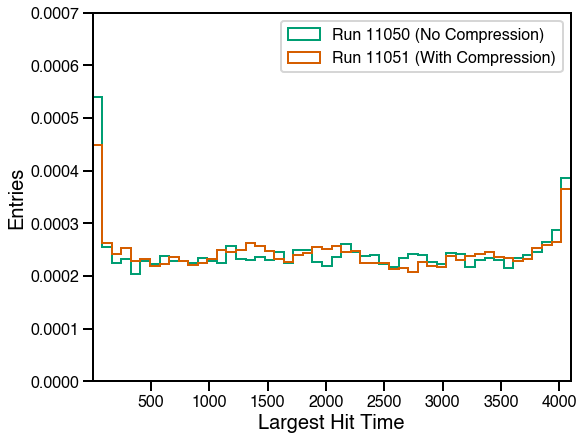

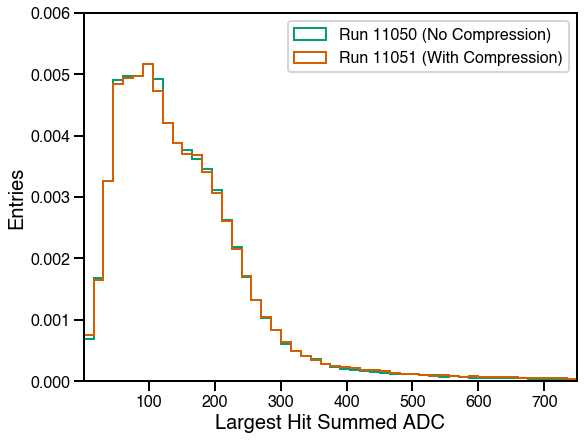

In [5]:
plot_signal_height(data, labels, cap=0.15)
plot_signal_time(data, labels, cap=0.0007)
plot_signal_sadc(data, labels, cap=0.006)